# Importing Liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import calendar
import warnings as wg 
wg.filterwarnings("ignore")

# Exploring our Dataset

In [2]:
df = pd.read_csv('sales_full_data.csv')

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
df.describe().transpose()

,count,unique,top,freq
Order ID,186305,178438,Order ID,355
Product,186305,20,USB-C Charging Cable,21903
Quantity Ordered,186305,10,1,168552
Price Each,186305,18,11.95,21903
Order Date,186305,142396,Order Date,355
Purchase Address,186305,140788,Purchase Address,355


# Cleaning our Dataset

In [6]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
len(df)

186850

In [8]:
df.isnull().sum()/len(df)

Order ID            0.002917
Product             0.002917
Quantity Ordered    0.002917
Price Each          0.002917
Order Date          0.002917
Purchase Address    0.002917
dtype: float64

In [9]:
df = df.dropna()

In [10]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [11]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

# Working with time data

In [12]:
df['Order Date']

0           04/19/19 08:46
2         04-07-2019 22:30
3         04-12-2019 14:38
4         04-12-2019 14:38
5           04/30/19 09:27
                ...       
186845      09/17/19 20:56
186846    09-01-2019 16:00
186847      09/23/19 07:39
186848      09/19/19 17:30
186849      09/30/19 00:18
Name: Order Date, Length: 186305, dtype: object

In [13]:
from datetime import datetime
df['Order Date'] = pd.to_datetime(df['Order Date'],  errors='coerce')

In [14]:
df['Order Date']

0        2019-04-19 08:46:00
2        2019-04-07 22:30:00
3        2019-04-12 14:38:00
4        2019-04-12 14:38:00
5        2019-04-30 09:27:00
                 ...        
186845   2019-09-17 20:56:00
186846   2019-09-01 16:00:00
186847   2019-09-23 07:39:00
186848   2019-09-19 17:30:00
186849   2019-09-30 00:18:00
Name: Order Date, Length: 186305, dtype: datetime64[ns]

In [15]:
df['year'] = df['Order Date'].apply(lambda date: date.year)
df['month'] = df['Order Date'].apply(lambda date: date.month)
df['day'] = df['Order Date'].apply(lambda date: date.day)
df['hour'] = df['Order Date'].apply(lambda date: date.hour)
df['minutes'] = df['Order Date'].apply(lambda date: date.minute)
df['month'] = pd.to_datetime(df['month'], format = '%m').dt.month_name().str.slice(stop = 3)

In [16]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,hour,minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019.0,Apr,19.0,8.0,46.0
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019.0,Apr,7.0,22.0,30.0
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019.0,Apr,12.0,14.0,38.0
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019.0,Apr,12.0,14.0,38.0
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019.0,Apr,30.0,9.0,27.0


In [17]:
df[df['Quantity Ordered'] == "Quantity Ordered"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,hour,minutes
519,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN,NaN,NaN,NaN
1149,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN,NaN,NaN,NaN
1155,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN,NaN,NaN,NaN
2878,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN,NaN,NaN,NaN
2893,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN,NaN,NaN,NaN
185551,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN,NaN,NaN,NaN
186563,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN,NaN,NaN,NaN
186632,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN,NaN,NaN,NaN,NaN


In [18]:
df_filtered = df[df['Quantity Ordered'] != "Quantity Ordered"] 
df_filtered.head(15) 
df_filtered.shape

(185950, 11)

In [19]:
df_filtered["Quantity Ordered"]=df_filtered["Quantity Ordered"].astype("float")
df_filtered["Price Each"]=df_filtered["Price Each"].astype("float")

In [20]:
df_filtered["sales"]=df_filtered["Quantity Ordered"]*df_filtered["Price Each"]

In [21]:
df_filtered.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,hour,minutes,sales
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019.0,Apr,19.0,8.0,46.0,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019.0,Apr,7.0,22.0,30.0,99.99
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019.0,Apr,12.0,14.0,38.0,600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019.0,Apr,12.0,14.0,38.0,11.99
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019.0,Apr,30.0,9.0,27.0,11.99


# Task -: Which month had the highest and lowest sales? What do you think the reason for this was?

In [22]:
results1 = df_filtered.groupby('month').sum()
results1

,Quantity Ordered,Price Each,year,day,hour,minutes,sales
month,,,,,,,
Apr,20558.0,3.367671e+06,36905301.0,282960.0,262259.0,544186.0,3.390670e+06
Aug,13448.0,2.230345e+06,24149259.0,192315.0,172289.0,353857.0,2.244468e+06
Dec,28114.0,4.588415e+06,50442696.0,401453.0,359978.0,733082.0,4.613443e+06
Feb,13449.0,2.188885e+06,24177525.0,174408.0,172669.0,354885.0,2.202022e+06
Jan,10903.0,1.811768e+06,19602505.0,155814.0,139485.0,282440.0,1.822257e+06
Jul,16072.0,2.632540e+06,28857567.0,227910.0,206169.0,417349.0,2.647776e+06
Jun,15253.0,2.562026e+06,27365526.0,209880.0,195528.0,402436.0,2.577802e+06
Mar,17005.0,2.791208e+06,30593907.0,241774.0,218969.0,447559.0,2.807100e+06
May,18667.0,3.135125e+06,33446754.0,264875.0,238780.0,487899.0,3.152607e+06


Text(0, 0.5, 'Sales')

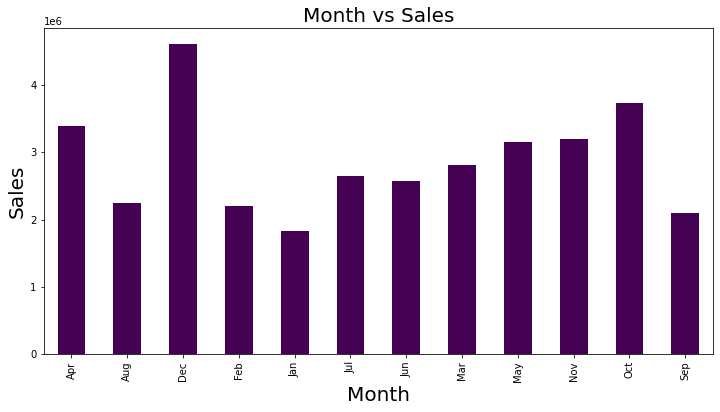

In [23]:
plt.figure(figsize = (12,6))
results1['sales'].plot(kind = 'bar', colormap = 'viridis')
plt.title('Month vs Sales', fontsize = 20)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Sales', fontsize = 20)

The company might be spending more money on April so the product sales are increasing. Maybe the best product sales are on December because it’s holiday and Christmas.

The best month for sales is December. The company earned approximately $4,810,000.

# At what time of the day would you put out advertisements so that sales increase?

In [24]:
df_filtered.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,hour,minutes,sales
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019.0,Apr,19.0,8.0,46.0,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019.0,Apr,7.0,22.0,30.0,99.99
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019.0,Apr,12.0,14.0,38.0,600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019.0,Apr,12.0,14.0,38.0,11.99
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019.0,Apr,30.0,9.0,27.0,11.99


In [25]:
results2 = df_filtered.groupby(['hour'])['Quantity Ordered'].count()

In [26]:
results2

hour
0.0      3910
1.0      2350
2.0      1243
3.0       831
4.0       854
5.0      1321
6.0      2482
7.0      4011
8.0      6256
9.0      8748
10.0    10944
11.0    12411
12.0    12587
13.0    12129
14.0    10984
15.0    10175
16.0    10384
17.0    10899
18.0    12280
19.0    12905
20.0    12228
21.0    10921
22.0     8822
23.0     6275
Name: Quantity Ordered, dtype: int64

Text(0.5, 1.0, 'Hours vs Quantity Ordered')

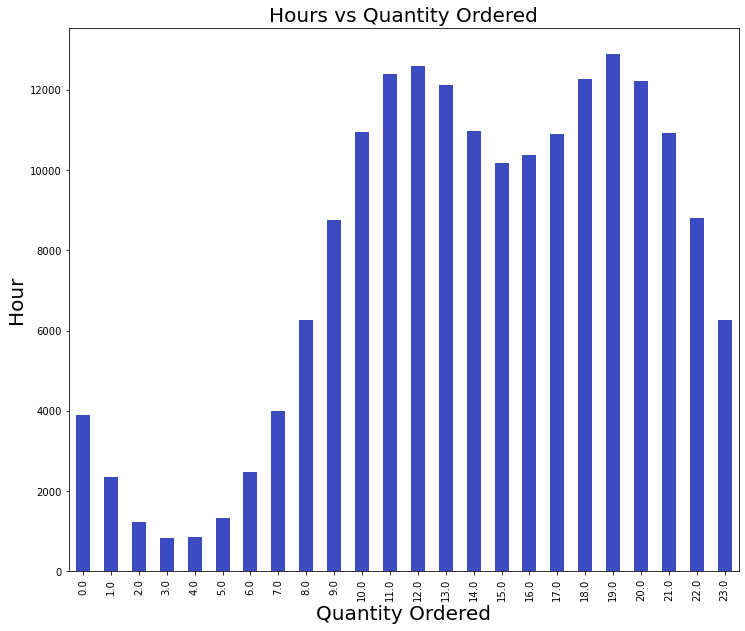

In [27]:
plt.figure(figsize = (12,10))
results2.plot(kind = 'bar', colormap = 'coolwarm')
plt.xlabel('Quantity Ordered', fontsize = 20)
plt.ylabel('Hour', fontsize = 20)
plt.title('Hours vs Quantity Ordered', fontsize = 20)

As you can see from Figure above, there are approximately 2 peaks at the data. They are 12 (12 PM) and 19 (7 PM). It makes sense since most people shopping during the day. From this data, we can suggest to our bussiness partner to advertise their product right before 12 PM and/or 7 PM. It could be 11.30 AM and/or 6.30 PM.

We can suggest to advertise the products right before 12 PM and/or 7 PM. It could be 11.30 AM and/or 6.30 PM.

# What products were sold the most?

In [28]:
df_filtered.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,hour,minutes,sales
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019.0,Apr,19.0,8.0,46.0,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019.0,Apr,7.0,22.0,30.0,99.99
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019.0,Apr,12.0,14.0,38.0,600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019.0,Apr,12.0,14.0,38.0,11.99
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019.0,Apr,30.0,9.0,27.0,11.99


In [29]:
results3 = df_filtered.groupby('Product').sum()['Quantity Ordered']

In [30]:
results3

Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float64

Text(0.5, 1.0, 'Product vs Quantity Ordered')

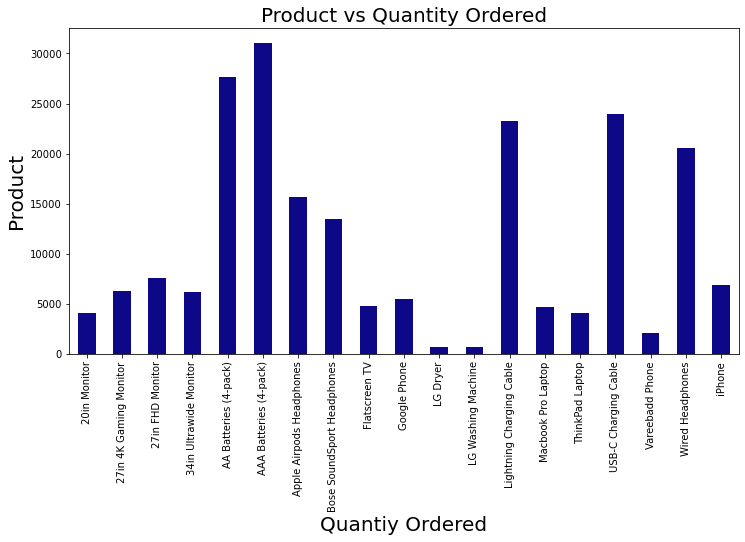

In [31]:
plt.figure(figsize = (12,6))
results3.plot(kind = 'bar', colormap = 'plasma')
plt.xlabel('Quantiy Ordered', fontsize = 20)
plt.ylabel('Product', fontsize = 20)
plt.title('Product vs Quantity Ordered', fontsize = 20)

Now we can see what product sold the most, it’s AAA Batteries(4 pack). We can also see that AA Batteries (4 pack), Lightning Charging Cable, USB-C Charging Cable, and Wired Headphones are sold more than other products. 

AAA Batteries(4 pack) is the most sold product. Because it’s cheaper than other products and has high demand.